Using the provided dataset, you are asked to train a model that predicts the diversity index of fish 
species based on different factors (morphological, environmental, etc.).

In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

Reading in the csv file and displaying the first 5 rows to get a first look at the data. 

In [4]:
df = pd.read_csv('species.csv',index_col=0)

In [5]:
df.head()

site    model  Year   Month   Latitude  Longitude      Depth  \
0  4733520_128U  biomass  2005  August  24.446433 -81.962900   9.800000   
1  4966028_487U   impact  2005    June  24.461130 -81.840099   8.821212   
2  4981032_102U  biomass  2005    July  24.467250 -81.832367  17.399239   
3  4999782_141U   impact  2005  August  24.468767 -81.822167   9.200000   
4  5026033_475U   impact  2005    June  24.470206 -81.808148   8.558032   

     Region  Coral_cover  Reef_complexity  ...  Pop_per_area_reef_20km  \
0  FLA KEYS     2.000000         0.550322  ...                0.047128   
1  FLA KEYS     6.181818         1.886364  ...                0.403795   
2  FLA KEYS     7.506345         0.749873  ...                0.392888   
3  FLA KEYS    10.000000         0.400000  ...                0.386919   
4  FLA KEYS     2.870486         0.289415  ...                0.383887   

   Random  impact  YEAR HABITAT_CD    REGION  PCT_CORAL  MAX_HARD_RELIEF  \
0    3786   0.205  2005    ISOL_LR  FLA KEYS   2.000000         0.550322   
1     503   0.382  2005    SPGR_HR  FLA KEYS   6.181818         1.886364   
2    3430     NaN  2005    CONT_LR  FLA KEYS   7.506345         0.749873   
3    3696     NaN  2005    ISOL_LR  FLA KEYS  10.000000         0.400000   
4    4090     NaN  2005    ISOL_LR  FLA KEYS   2.870486         0.289415   

   no.divers  Diversity_index  
0          4         0.877755  
1          4         0.912085  
2          4         0.882112  
3          4         0.806049  
4          4         0.829156  

[5 rows x 55 columns]

Using the info function to look at the column names and datatypes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

Listing the NA values in each column.

In [9]:
df.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

27 columns are floats which indercate continious data. 
15 are intergers which are discrete data. 
14 columns are objects which means categorical data.

You can see above the number of NA values in each column. A desision will need to be made on if the data in these columns is useable or needs to be dropped.


Using the describe function to get some summary statistics on the non-object columns.

In [12]:
df.describe()

Year     Latitude    Longitude        Depth  Coral_cover  \
count  3999.000000  3999.000000  3999.000000  3999.000000  3292.000000   
mean   2012.886222    25.361813   -80.912910    12.031226     4.549820   
std       3.629448     0.806724     1.051129     6.942690     5.522744   
min    2005.000000    24.431943   -82.986818     1.300482     0.000000   
25%    2011.000000    24.632586   -81.695419     6.351316     1.500000   
50%    2013.000000    25.123213   -80.292226    10.171806     2.758143   
75%    2016.000000    26.034196   -80.092946    17.148568     5.283544   
max    2018.000000    27.189445   -79.993800    32.295441    55.000000   

       Reef_complexity          SST          NPP  Wave_exposure  \
count      3292.000000  3999.000000  3999.000000    3999.000000   
mean          1.100154    23.760696   523.320811       7.322459   
std           0.851008     0.552442   163.404174       0.211270   
min           0.075887    22.405206   287.664307       5.213092   
25%           0.500000    23.608484   365.925385       7.294437   
50%           0.900596    23.929285   533.677063       7.368210   
75%           1.448243    24.200861   632.628479       7.455595   
max          10.538338    24.436212  1330.589233       7.597482   

       Coral_area_UFRTM_20km  ...  Rec_reliance  Commercial_pounds_landed  \
count            3999.000000  ...   3910.000000              3.998000e+03   
mean            76727.255314  ...      0.424433              6.312866e+05   
std             44693.794158  ...      2.247541              4.861803e+05   
min             12257.000000  ...     -0.185000              1.706314e+05   
25%             50594.000000  ...     -0.185000              2.469954e+05   
50%             60682.000000  ...     -0.185000              3.180504e+05   
75%             91516.000000  ...      0.044000              8.556702e+05   
max            280125.000000  ...     12.140000              1.511066e+06   

       Pop_per_area_reef_20km       Random       impact         YEAR  \
count             3999.000000  3999.000000  2779.000000  3999.000000   
mean                 6.386781  5047.471618     0.400637  2012.886222   
std                 11.092795  2919.598275     0.281552     3.629448   
min                  0.000000     1.000000     0.000000  2005.000000   
25%                  0.039136  2550.500000     0.174000  2011.000000   
50%                  0.248873  5097.000000     0.382000  2013.000000   
75%                 12.681632  7602.000000     0.694000  2016.000000   
max                 55.371104  9997.000000     1.000000  2018.000000   

         PCT_CORAL  MAX_HARD_RELIEF    no.divers  Diversity_index  
count  3292.000000      3292.000000  3999.000000      3999.000000  
mean      4.549820         1.100154     3.115779         0.831469  
std       5.522744         0.851008     0.998422         0.114777  
min       0.000000         0.075887     2.000000         0.000000  
25%       1.500000         0.500000     2.000000         0.811582  
50%       2.758143         0.900596     4.000000         0.867035  
75%       5.283544         1.448243     4.000000         0.900148  
max      55.000000        10.538338     8.000000         0.956324  

[8 rows x 41 columns]

Filling in NaN values. The PDF provided explains what the NaN values are.

In [14]:
df['Keys_Divisions'] = df['Keys_Divisions'].fillna('NotinFlorida')
df['FKNMS'] = df['FKNMS'].fillna('NotinFlorida')
df['DryTortugas'] = df['DryTortugas'].fillna('NonDRTO')
df['BNP'] = df['BNP'].fillna('NonBNP')
df['CoralECA'] = df['CoralECA'].fillna('NonECA')

Updated List of the Na values in each column

In [16]:
df.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

Dropping the row that has the missing value in Commercial_pounds_landed

In [18]:
df = df.drop(index=df.loc[df.Commercial_pounds_landed.isna(),:].index)
df.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

Selecting all the numerical data

In [20]:
dfNUM = df.select_dtypes(include=['int64','float64'])
dfNUM

Year   Latitude  Longitude      Depth  Coral_cover  Reef_complexity  \
0     2005  24.446433 -81.962900   9.800000     2.000000         0.550322   
1     2005  24.461130 -81.840099   8.821212     6.181818         1.886364   
2     2005  24.467250 -81.832367  17.399239     7.506345         0.749873   
3     2005  24.468767 -81.822167   9.200000    10.000000         0.400000   
4     2005  24.470206 -81.808148   8.558032     2.870486         0.289415   
...    ...        ...        ...        ...          ...              ...   
3994  2018  25.770183 -80.087650  17.953469     1.000000         0.834130   
3995  2018  24.580356 -81.303040   7.148084     1.246807         0.498723   
3996  2018  25.590833 -80.096706   2.455478     1.795652         0.535043   
3997  2018  25.838121 -80.099420   8.145070     1.000000         0.601972   
3998  2018  25.821798 -80.091136  14.344588     1.000000         0.551203   

            SST         NPP  Wave_exposure  Coral_area_UFRTM_20km  ...  \
0     23.595392  550.865051       6.992729                  88333  ...   
1     23.578271  577.431946       6.950751                  91742  ...   
2     23.551355  595.320252       6.950181                  94607  ...   
3     23.556451  590.443543       6.959807                  96139  ...   
4     23.567590  579.874023       6.914992                  98167  ...   
...         ...         ...            ...                    ...  ...   
3994  24.261774  453.504700       7.363275                  76608  ...   
3995  23.749170  583.637329       7.319593                 146627  ...   
3996  24.121240  553.635559       7.216960                  40370  ...   
3997  24.224939  386.825714       7.371410                  85071  ...   
3998  24.235864  393.729126       7.396813                  83596  ...   

      Rec_reliance  Commercial_pounds_landed  Pop_per_area_reef_20km  Random  \
0           -0.185                 1511066.2                0.047128    3786   
1           -0.185                  855670.2                0.403795     503   
2           -0.185                  855670.2                0.392888    3430   
3           -0.185                  855670.2                0.386919    3696   
4           -0.185                  855670.2                0.383887    4090   
...            ...                       ...                     ...     ...   
3994        -0.185                  318050.4               12.064380    6958   
3995        -0.056                  855670.2                0.042837    7602   
3996        -0.185                  318050.4                0.402824    5480   
3997        -0.185                  318050.4               14.823301    3575   
3998        -0.185                  318050.4               13.893536    3506   

      impact  YEAR  PCT_CORAL  MAX_HARD_RELIEF  no.divers  Diversity_index  
0      0.205  2005   2.000000         0.550322          4         0.877755  
1      0.382  2005   6.181818         1.886364          4         0.912085  
2        NaN  2005   7.506345         0.749873          4         0.882112  
3        NaN  2005  10.000000         0.400000          4         0.806049  
4        NaN  2005   2.870486         0.289415          4         0.829156  
...      ...   ...        ...              ...        ...              ...  
3994   0.709  2018   1.000000         0.834130          2         0.829341  
3995     NaN  2018   1.246807         0.498723          2         0.831818  
3996   0.705  2018   1.795652         0.535043          2         0.824709  
3997   0.740  2018   1.000000         0.601972          2         0.857023  
3998   0.740  2018   1.000000         0.551203          2         0.745798  

[3998 rows x 41 columns]

Running a correlation cofficient and making it only show values when above 0.8

In [22]:
Pcof = dfNUM.corr()
mask = (py.abs(Pcof) > 0.8) & (Pcof != 1.0)
high_corr = Pcof[mask]
pd.set_option('display.max_columns', None)
print(high_corr)

                             Year  Latitude  Longitude  Depth  Coral_cover  \
Year                          NaN       NaN        NaN    NaN          NaN   
Latitude                      NaN       NaN        NaN    NaN          NaN   
Longitude                     NaN       NaN        NaN    NaN          NaN   
Depth                         NaN       NaN        NaN    NaN          NaN   
Coral_cover                   NaN       NaN        NaN    NaN          NaN   
Reef_complexity               NaN       NaN        NaN    NaN          NaN   
SST                           NaN       NaN   0.892720    NaN          NaN   
NPP                           NaN       NaN        NaN    NaN          NaN   
Wave_exposure                 NaN       NaN        NaN    NaN          NaN   
Coral_area_UFRTM_20km         NaN       NaN        NaN    NaN          NaN   
Coral_area_UFRTM_200km        NaN -0.805442        NaN    NaN          NaN   
Depth_Sbrocco                 NaN       NaN        NaN    NaN   

#### Recording the vairables that are strongly related to eachother, assigning them their own dataframes and making scatterplots of them all agaisnt eachother

Links between:

Marina_slips_10km, Marina_slips_25km, Population_20km, Population_50km, Recreationa_fishermen_50km, Tourist_fishing, Impact = dfcor1

Comm_engangement, Comm_reliance, Rec_engagement = dfcor2

Longitude, Latitude, Commerical_pounds_landed, SST, coral_area_UFRTM_200km, Impact = dfcor3


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

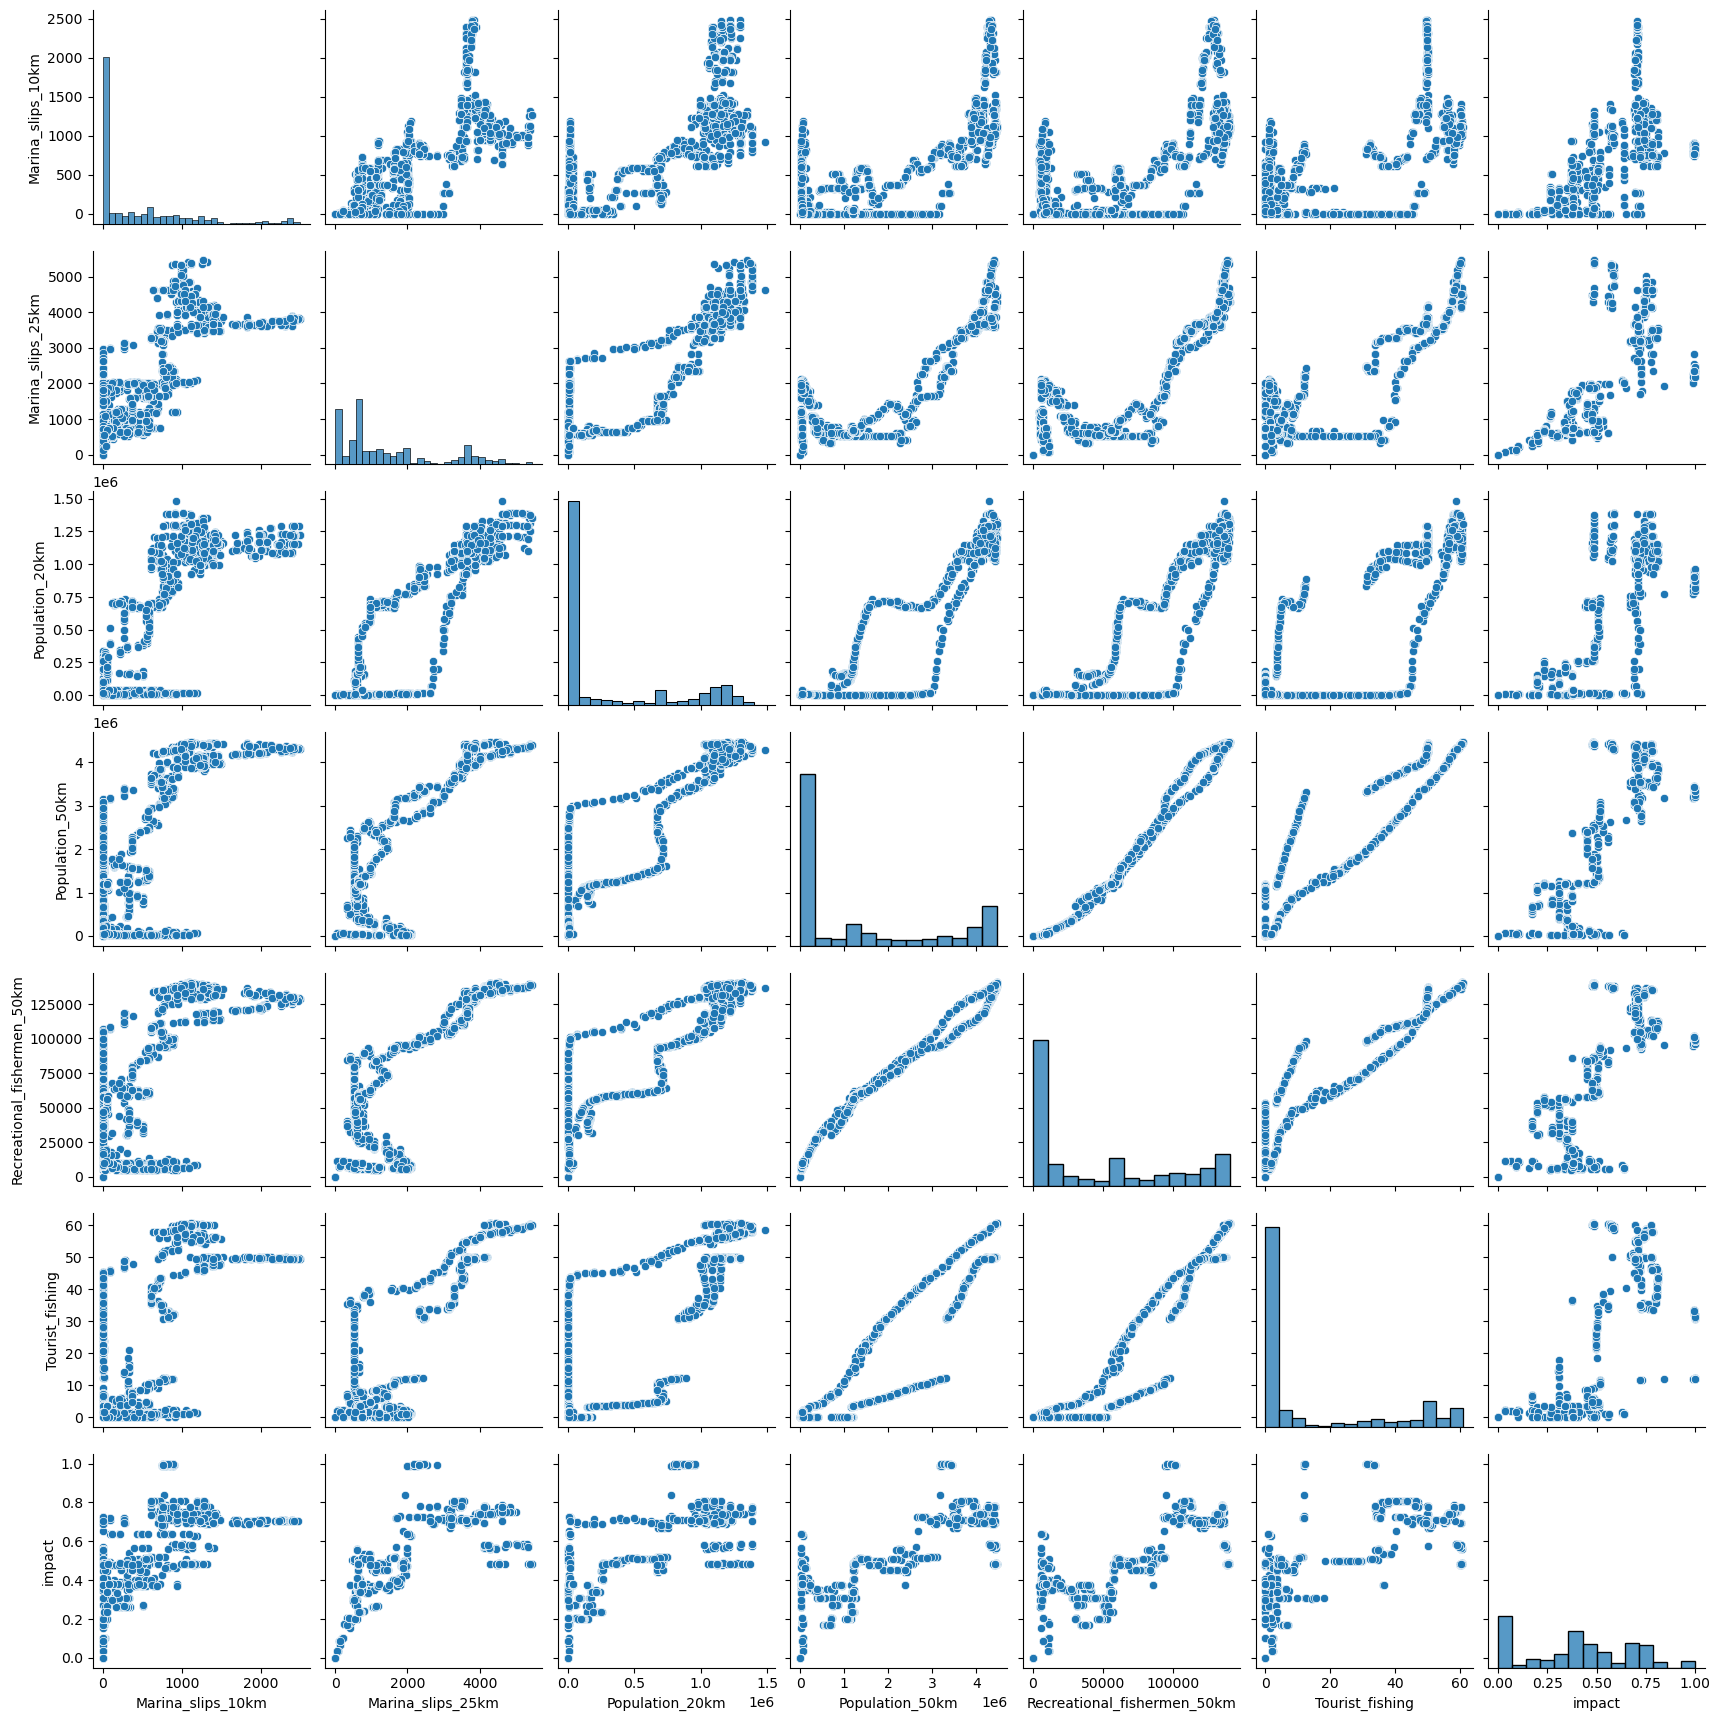

In [27]:
dfcor1 = df[['Marina_slips_10km', 'Marina_slips_25km', 'Population_20km', 'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing', 'impact']]
dfcof1 = dfcor1.corr()
sns.pairplot(dfcor1)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


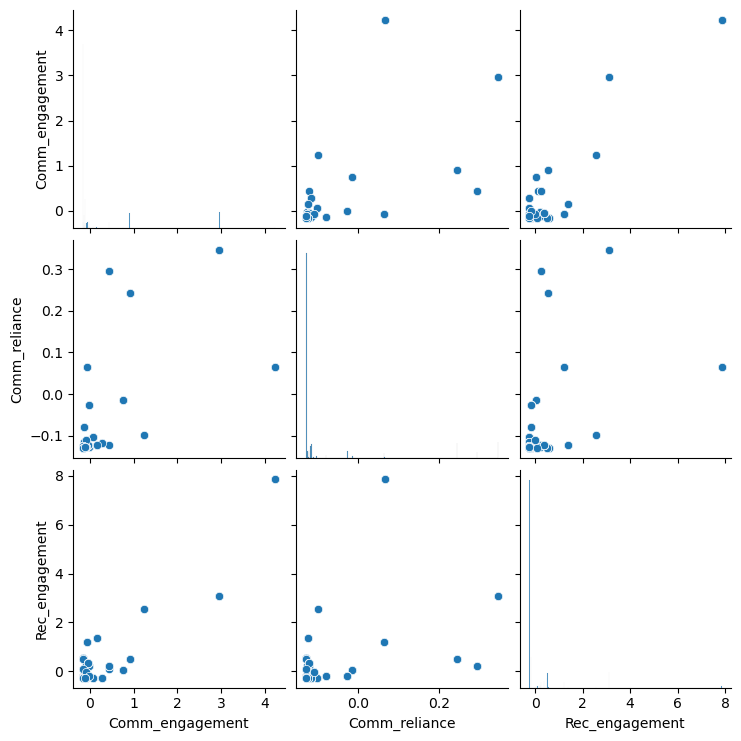

In [29]:
dfcor2 = df[['Comm_engagement', 'Comm_reliance', 'Rec_engagement']]
dfcof2 = dfcor2.corr()
sns.pairplot(dfcor2)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

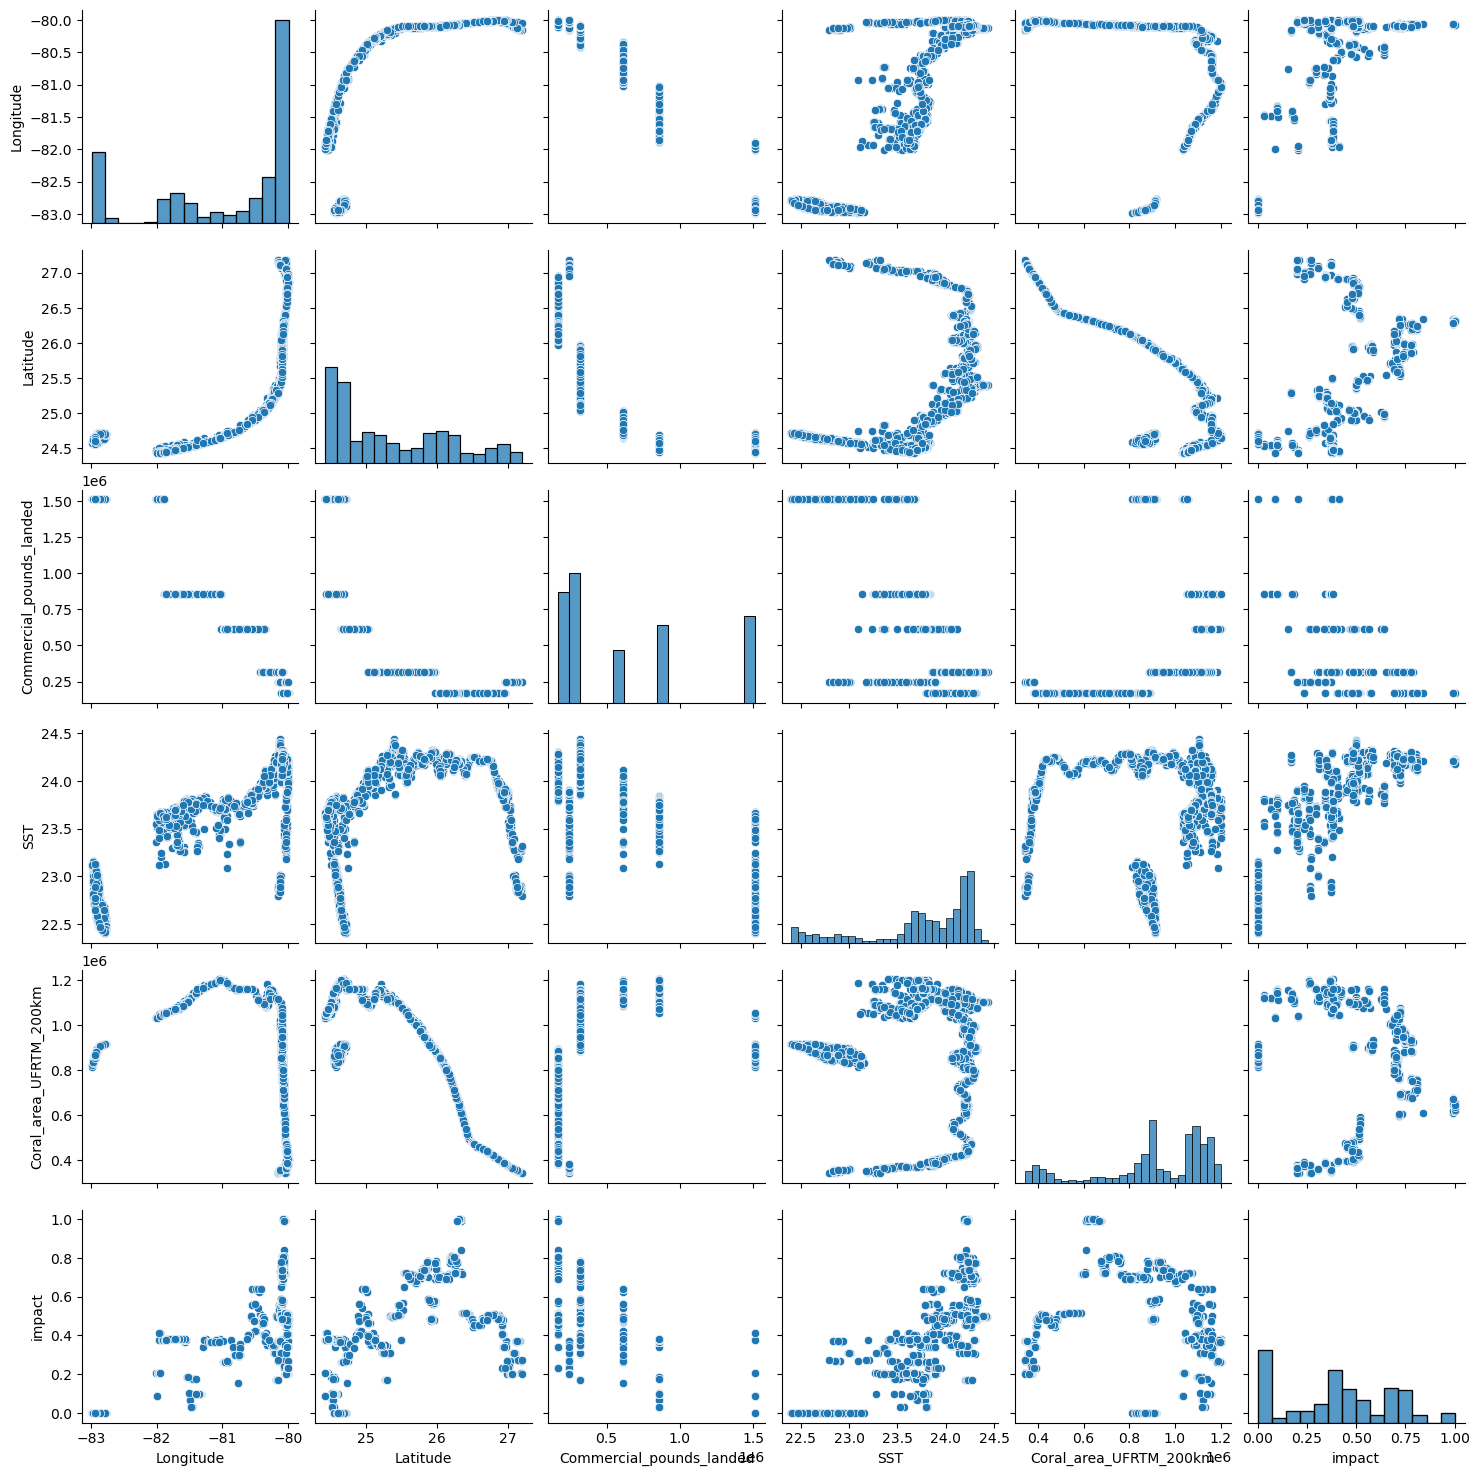

In [31]:
dfcor3 = df[['Longitude', 'Latitude', 'Commercial_pounds_landed', 'SST', 'Coral_area_UFRTM_200km', 'impact']]
dfcof3 = dfcor3.corr()
sns.pairplot(dfcor3)
plt.show()

From here, a decision needs to be made on the missing values. If the data is not needed those columns can be dropped. If based on these correlations above however, it is decided that the data is needed, the missing values need to be filled in based on the data in the other columns.

Feature Engineering:

Handling the categorical and numercial missing values and columns in Species datasets.

In [1]:
import pandas as pd

# Load species dataset:

species_df = pd.read_csv(r"C:\Users\nihal\OneDrive\Desktop\ML Project 2\Project 2\Data\species.csv")

# Display the first few rows of the Species dataset:

print("Species Data:")
print(species_df.head())

Species Data:
   Unnamed: 0          site    model  Year   Month   Latitude  Longitude  \
0           0  4733520_128U  biomass  2005  August  24.446433 -81.962900   
1           1  4966028_487U   impact  2005    June  24.461130 -81.840099   
2           2  4981032_102U  biomass  2005    July  24.467250 -81.832367   
3           3  4999782_141U   impact  2005  August  24.468767 -81.822167   
4           4  5026033_475U   impact  2005    June  24.470206 -81.808148   

       Depth    Region  Coral_cover  ...  Pop_per_area_reef_20km  Random  \
0   9.800000  FLA KEYS     2.000000  ...                0.047128    3786   
1   8.821212  FLA KEYS     6.181818  ...                0.403795     503   
2  17.399239  FLA KEYS     7.506345  ...                0.392888    3430   
3   9.200000  FLA KEYS    10.000000  ...                0.386919    3696   
4   8.558032  FLA KEYS     2.870486  ...                0.383887    4090   

   impact  YEAR HABITAT_CD    REGION  PCT_CORAL  MAX_HARD_RELIEF  no.div

Check for basic information and summary statistics.

In [2]:
# Check basic info and summary statistics:

species_df.info()

# Summary statistics:

print(species_df.describe())

# Check for categorical columns:

categorical_cols_species = species_df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in species dataset:", categorical_cols_species)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3999 non-null   int64  
 1   site                         3999 non-null   object 
 2   model                        3999 non-null   object 
 3   Year                         3999 non-null   int64  
 4   Month                        3999 non-null   object 
 5   Latitude                     3999 non-null   float64
 6   Longitude                    3999 non-null   float64
 7   Depth                        3999 non-null   float64
 8   Region                       3999 non-null   object 
 9   Coral_cover                  3292 non-null   float64
 10  Reef_complexity              3292 non-null   float64
 11  SST                          3999 non-null   float64
 12  NPP                          3999 non-null   float64
 13  Wave_exposure     

Check for missing values in the dataset.

In [3]:
# Check for missing values in each dataset:

missing_values_species = species_df.isnull().sum()

print("Missing values in species dataset:")
print(missing_values_species[missing_values_species > 0])

# Use Mean/Median imputation for a numerical column.
# Use Mode imputation for a categorical column.

Missing values in species dataset:
Coral_cover                  707
Reef_complexity              707
Total_gravity_intercept      103
Total_gravity                103
Keys_Divisions              1429
FKNMS                       2341
DryTortugas                 3372
BNP                         3740
CoralECA                    2635
connectivity                 623
Comm_engagement               89
Comm_reliance                 89
Rec_engagement                89
Rec_reliance                  89
Commercial_pounds_landed       1
impact                      1220
PCT_CORAL                    707
MAX_HARD_RELIEF              707
dtype: int64


Check for missing values in respective columns with numerical variables and handle the missing values using mean and median imputation.

Print the missing values before and after imputation.

In [4]:
# Check for missing values in relevant columns:
missing_values = species_df[['Coral_cover', 'Reef_complexity']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'Coral_cover':
if 'Coral_cover' in species_df.columns:
    species_df['Coral_cover'] = species_df['Coral_cover'].fillna(species_df['Coral_cover'].mean())

# Median imputation for 'Reef_complexity':
if 'Reef_complexity' in species_df.columns:
    species_df['Reef_complexity'] = species_df['Reef_complexity'].fillna(species_df['Reef_complexity'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['Coral_cover', 'Reef_complexity']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 Coral_cover        707
Reef_complexity    707
dtype: int64
Missing values after imputation:
 Coral_cover        0
Reef_complexity    0
dtype: int64


In [5]:
# Check for missing values in relevant columns:
missing_values = species_df[['connectivity', 'Comm_engagement']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'connectivity':
if 'connectivity' in species_df.columns:
    species_df['connectivity'] = species_df['connectivity'].fillna(species_df['connectivity'].mean())

# Median imputation for 'Comm_engagement':
if 'Comm_engagement' in species_df.columns:
    species_df['Comm_engagement'] = species_df['Comm_engagement'].fillna(species_df['Comm_engagement'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['connectivity', 'Comm_engagement']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 connectivity       623
Comm_engagement     89
dtype: int64
Missing values after imputation:
 connectivity       0
Comm_engagement    0
dtype: int64


In [6]:
# Check for missing values in relevant columns:
missing_values = species_df[['Comm_reliance', 'Rec_engagement']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'Comm_reliance':
if 'Comm_reliance' in species_df.columns:
    species_df['Comm_reliance'] = species_df['Comm_reliance'].fillna(species_df['Comm_reliance'].mean())

# Median imputation for 'Rec_engagement':
if 'Rec_engagement' in species_df.columns:
    species_df['Rec_engagement'] = species_df['Rec_engagement'].fillna(species_df['Rec_engagement'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['Comm_reliance', 'Rec_engagement']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 Comm_reliance     89
Rec_engagement    89
dtype: int64
Missing values after imputation:
 Comm_reliance     0
Rec_engagement    0
dtype: int64


In [7]:
# Check for missing values in relevant columns:
missing_values = species_df[['PCT_CORAL', 'MAX_HARD_RELIEF']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'PCT_CORAL':
if 'PCT_CORAL' in species_df.columns:
    species_df['PCT_CORAL'] = species_df['PCT_CORAL'].fillna(species_df['PCT_CORAL'].mean())

# Median imputation for 'MAX_HARD_RELIEF':
if 'MAX_HARD_RELIEF' in species_df.columns:
    species_df['MAX_HARD_RELIEF'] = species_df['MAX_HARD_RELIEF'].fillna(species_df['MAX_HARD_RELIEF'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['PCT_CORAL', 'MAX_HARD_RELIEF']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 PCT_CORAL          707
MAX_HARD_RELIEF    707
dtype: int64
Missing values after imputation:
 PCT_CORAL          0
MAX_HARD_RELIEF    0
dtype: int64


In [8]:
# Check for missing values in relevant columns:
missing_values = species_df[['Rec_reliance', 'Commercial_pounds_landed']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'Rec_reliance':
if 'Rec_reliance' in species_df.columns:
    species_df['Rec_reliance'] = species_df['Rec_reliance'].fillna(species_df['Rec_reliance'].mean())

# Median imputation for 'Commercial_pounds_landed':
if 'Commercial_pounds_landed' in species_df.columns:
    species_df['Commercial_pounds_landed'] = species_df['Commercial_pounds_landed'].fillna(species_df['Commercial_pounds_landed'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['Rec_reliance', 'Commercial_pounds_landed']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 Rec_reliance                89
Commercial_pounds_landed     1
dtype: int64
Missing values after imputation:
 Rec_reliance                0
Commercial_pounds_landed    0
dtype: int64


In [9]:
# Check for missing values in relevant columns:
missing_values = species_df[['Total_gravity', 'Total_gravity_intercept']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Mean imputation for 'Total_gravity':
if 'Total_gravity' in species_df.columns:
    species_df['Total_gravity'] = species_df['Total_gravity'].fillna(species_df['Total_gravity'].mean())

# Median imputation for 'Total_gravity_intercept':
if 'Total_gravity_intercept' in species_df.columns:
    species_df['Total_gravity_intercept'] = species_df['Total_gravity_intercept'].fillna(species_df['Total_gravity_intercept'].median())

# Check for missing values after imputation:
missing_values_after = species_df[['Total_gravity_intercept', 'Total_gravity']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 Total_gravity              103
Total_gravity_intercept    103
dtype: int64
Missing values after imputation:
 Total_gravity_intercept    0
Total_gravity              0
dtype: int64


In [10]:
missing_values_species = species_df.isnull().sum()

print("\nMissing values in Species dataset:")
print(missing_values_species[missing_values_species > 0])


Missing values in Species dataset:
Keys_Divisions    1429
FKNMS             2341
DryTortugas       3372
BNP               3740
CoralECA          2635
impact            1220
dtype: int64


Check for missing values in respective columns with categorical variables and handle the missing values using mode imputation.

Print the missing values before and after imputation.

In [11]:
# Check for missing values in relevant columns:
missing_values = species_df[['Keys_Divisions', 'FKNMS', 'DryTortugas', 'BNP', 'CoralECA']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Perform mode imputation instead of mean/median:
if 'Keys_Divisions' in species_df.columns:
    species_df['Keys_Divisions'] = species_df['Keys_Divisions'].fillna(species_df['Keys_Divisions'].mode()[0])


if 'FKNMS' in species_df.columns:
    species_df['FKNMS'] = species_df['FKNMS'].fillna(species_df['FKNMS'].mode()[0])
    

if 'DryTortugas' in species_df.columns:
    species_df['DryTortugas'] = species_df['DryTortugas'].fillna(species_df['DryTortugas'].mode()[0])
    

if 'BNP' in species_df.columns:
    species_df['BNP'] = species_df['BNP'].fillna(species_df['BNP'].mode()[0])
    

if 'CoralECA' in species_df.columns:
    species_df['CoralECA'] = species_df['CoralECA'].fillna(species_df['CoralECA'].mode()[0])
    
# Check for missing values after imputation:
missing_values_after = species_df[['Keys_Divisions', 'FKNMS', 'DryTortugas', 'BNP', 'CoralECA']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 Keys_Divisions    1429
FKNMS             2341
DryTortugas       3372
BNP               3740
CoralECA          2635
dtype: int64
Missing values after imputation:
 Keys_Divisions    0
FKNMS             0
DryTortugas       0
BNP               0
CoralECA          0
dtype: int64


In [12]:
# Check for missing values in relevant columns:
missing_values = species_df[['impact']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Perform mode imputation instead of ean/median:
if 'impact' in species_df.columns:
    species_df['impact'] = species_df['impact'].fillna(species_df['impact'].mode()[0])

# Check for missing values after imputation:
missing_values_after = species_df[['impact']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 impact    1220
dtype: int64
Missing values after imputation:
 impact    0
dtype: int64


In [ ]:
Install imblearn to handle imbalance datasets.

In [14]:
!pip install imblearn

Load the species dataset and display first few rows of the data.

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
species_df = pd.read_csv(r"C:\Users\nihal\OneDrive\Desktop\ML Project 2\Project 2\Data\species.csv")

# Check the first few rows of the data
species_df.head()

Unnamed: 0          site    model  Year   Month   Latitude  Longitude  \
0           0  4733520_128U  biomass  2005  August  24.446433 -81.962900   
1           1  4966028_487U   impact  2005    June  24.461130 -81.840099   
2           2  4981032_102U  biomass  2005    July  24.467250 -81.832367   
3           3  4999782_141U   impact  2005  August  24.468767 -81.822167   
4           4  5026033_475U   impact  2005    June  24.470206 -81.808148   

       Depth    Region  Coral_cover  ...  Pop_per_area_reef_20km  Random  \
0   9.800000  FLA KEYS     2.000000  ...                0.047128    3786   
1   8.821212  FLA KEYS     6.181818  ...                0.403795     503   
2  17.399239  FLA KEYS     7.506345  ...                0.392888    3430   
3   9.200000  FLA KEYS    10.000000  ...                0.386919    3696   
4   8.558032  FLA KEYS     2.870486  ...                0.383887    4090   

   impact  YEAR HABITAT_CD    REGION  PCT_CORAL  MAX_HARD_RELIEF  no.divers  \
0   0.205  2005    ISOL_LR  FLA KEYS   2.000000         0.550322          4   
1   0.382  2005    SPGR_HR  FLA KEYS   6.181818         1.886364          4   
2     NaN  2005    CONT_LR  FLA KEYS   7.506345         0.749873          4   
3     NaN  2005    ISOL_LR  FLA KEYS  10.000000         0.400000          4   
4     NaN  2005    ISOL_LR  FLA KEYS   2.870486         0.289415          4   

   Diversity_index  
0         0.877755  
1         0.912085  
2         0.882112  
3         0.806049  
4         0.829156  

[5 rows x 56 columns]

Handle the missing values in the Impact column in the SiteEvn dataset to ensure smooth process further using mode imputation.

In [22]:
import pandas as pd

site_env_df = pd.read_excel(r"C:\Users\nihal\OneDrive\Desktop\ML Project 2\Project 2\Resources\doi_10_5061_dryad_xpnvx0kmn__v20230901\SiteEnv.xlsx")

# Check for missing values in relevant columns:
missing_values = site_env_df[['impact']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Perform mode imputation instead of mean/median:
if 'impact' in site_env_df.columns:
    site_env_df['impact'] = site_env_df['impact'].fillna(site_env_df['impact'].mode()[0])

# Check for missing values after imputation:
missing_values_after = site_env_df[['impact']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 impact    1117
dtype: int64
Missing values after imputation:
 impact    0
dtype: int64


Handle the missing values in the Impact column in the SpecAbund dataset to ensure smooth process further using mode imputation.

In [23]:
import pandas as pd

spec_abund_df = pd.read_excel(r"C:\Users\nihal\OneDrive\Desktop\ML Project 2\Project 2\Resources\doi_10_5061_dryad_xpnvx0kmn__v20230901\SpecAbund.xlsx")

# Check for missing values in relevant columns:
missing_values = spec_abund_df[['impact']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Perform mode imputation instead of mean/median:
if 'impact' in spec_abund_df.columns:
    spec_abund_df['impact'] = spec_abund_df['impact'].fillna(spec_abund_df['impact'].mode()[0])

# Check for missing values after imputation:
missing_values_after = spec_abund_df[['impact']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values before imputation:
 impact    1220
dtype: int64
Missing values after imputation:
 impact    0
dtype: int64


Handling Missing Data, Binning a Target Variable, and Applying SMOTE for Class Balancing.

This code demonstrates how to handle missing data in both numeric and categorical columns, bin a continuous target variable into categories, and apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.

Print class distribution before and after SMOTE process to handle class imbalance.

Visualize the new distribution of binned Impact column after SMOTE.

Class distribution before SMOTE:
impact
Medium    1132
Low        918
High       729
Name: count, dtype: int64
Length of X_encoded: 2779
Length of y_binned: 2779
Class distribution after SMOTE:
impact
Low       1132
Medium    1132
High      1132
Name: count, dtype: int64


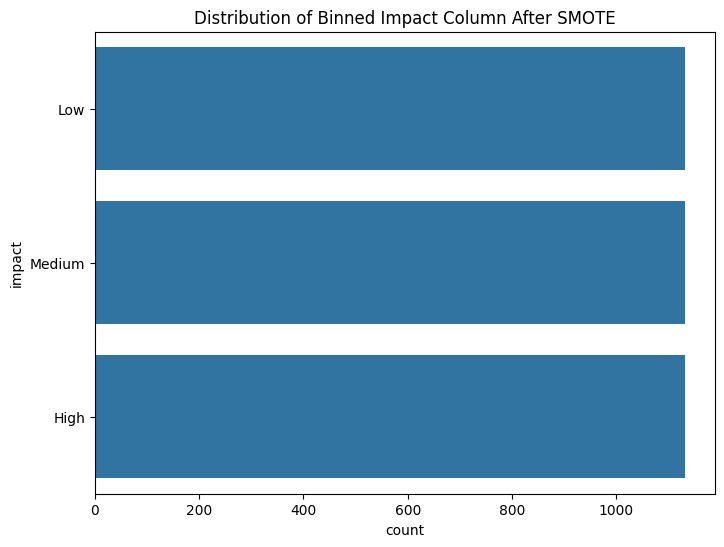

In [28]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Check the class distribution before SMOTE:
print("Class distribution before SMOTE:")
print(y_binned.value_counts())

# Step 1: Separate features (X) and target (y):
X = species_df.drop(columns=['impact'])  # Drop the target column 'impact'
y = species_df['impact']

# Step 2: Separate numeric and categorical columns:
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

# Step 3: Impute numeric columns with the mean strategy:
imputer_numeric = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Step 4: Impute categorical columns with the most frequent strategy:
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_cols]), columns=categorical_cols)

# Step 5: Combine the imputed numeric and categorical columns back into a single DataFrame:
X_imputed_df = pd.concat([X_numeric_imputed, X_categorical_imputed], axis=1)

# Step 6: Convert categorical features to numerical using One-Hot Encoding:
X_encoded = pd.get_dummies(X_imputed_df, drop_first=True)

# Step 7: Bin the continuous 'impact' column into categories:
y_binned = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])

# Step 8: Drop any NaN values from y_binned and the corresponding rows in X_encoded:
valid_indices = y_binned.dropna().index
X_encoded = X_encoded.loc[valid_indices]
y_binned = y_binned.dropna()

# Ensure that both have the same length:
print("Length of X_encoded:", len(X_encoded))
print("Length of y_binned:", len(y_binned))

# Step 9: Apply SMOTE to the One-Hot encoded data and binned target:
smote = SMOTE(random_state=42)

# Resample the data:
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_binned)

# Step 10: Check the new distribution of the resampled target variable:
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 11: Visualize the new distribution after SMOTE:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(y_resampled)
plt.title('Distribution of Binned Impact Column After SMOTE')
plt.show()

Outlier Detection and Treatment Using Z-score Method.

In this code, we detect and treat outliers in numeric columns using the Z-score method. 
A Z-score represents how many standard deviations a data point is from the mean. 
We treat outliers by capping them to the mean of the column for values where the absolute Z-score exceeds a threshold of 3.

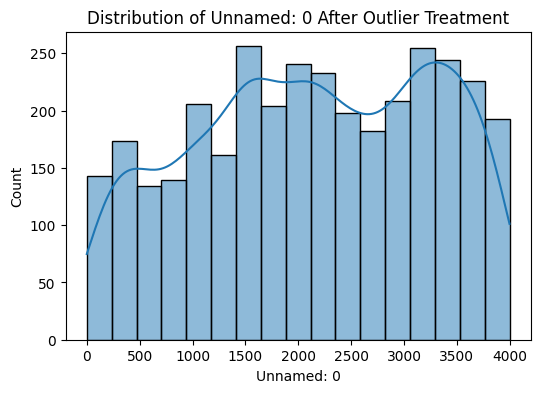

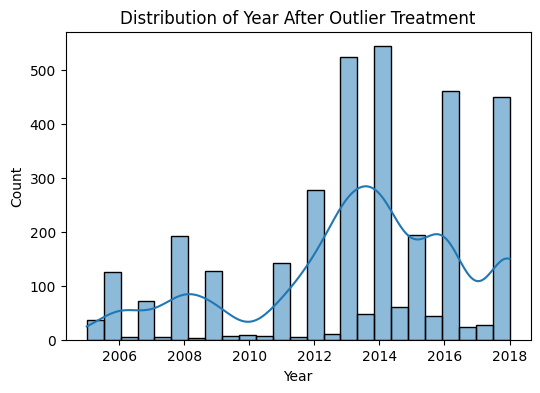

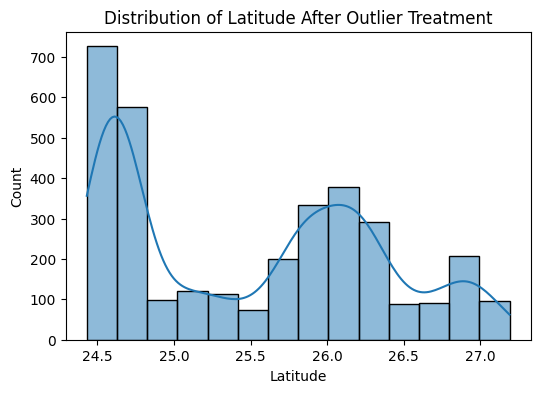

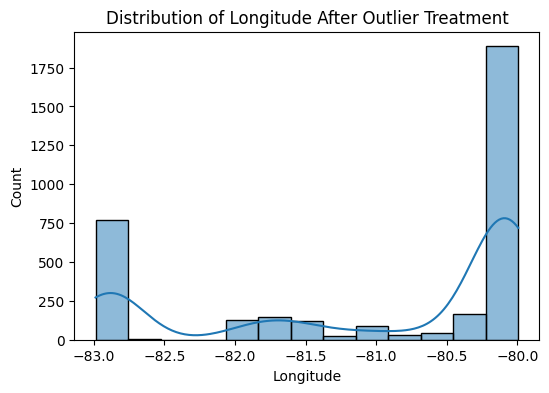

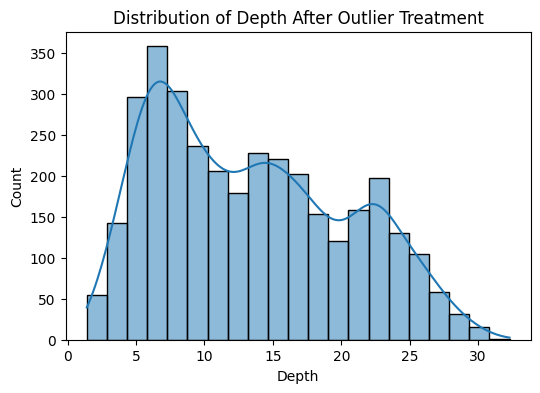

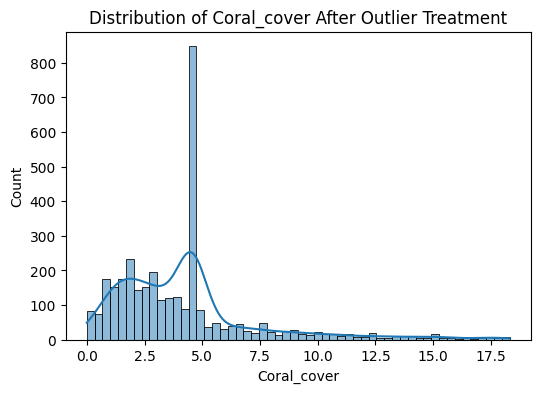

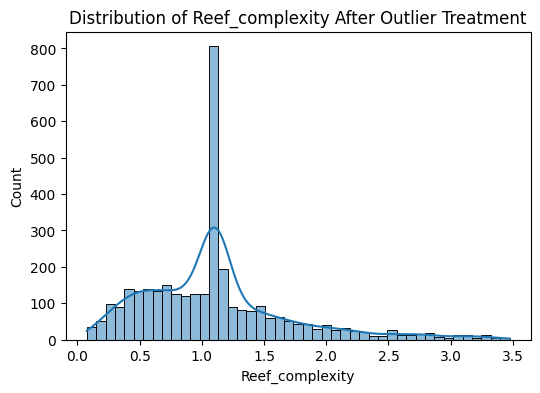

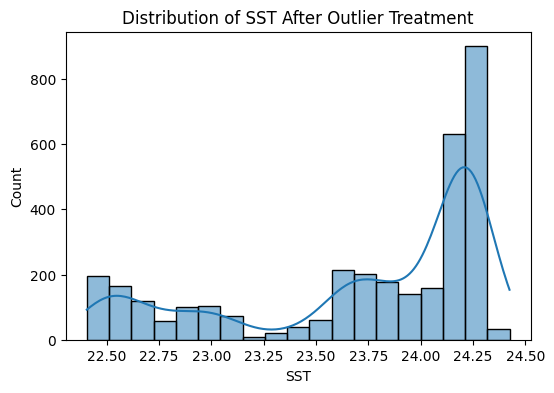

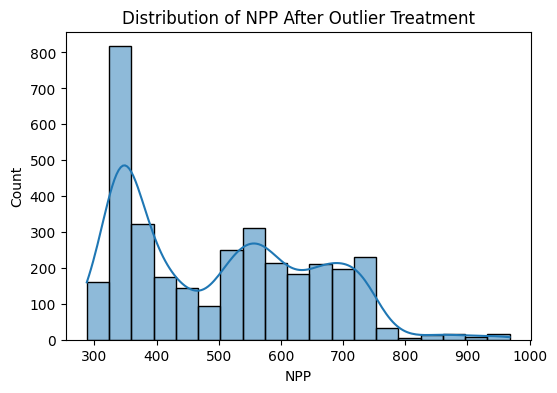

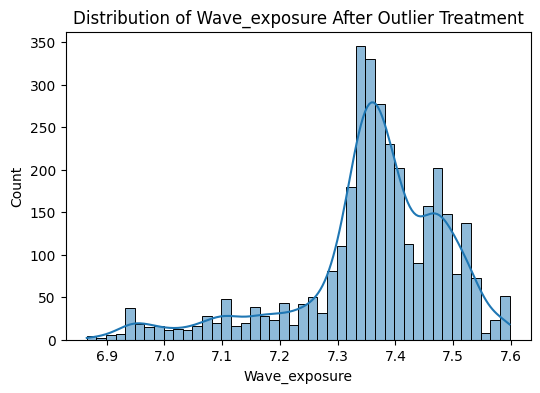

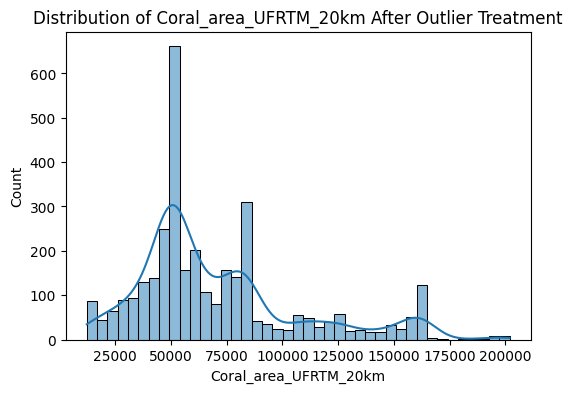

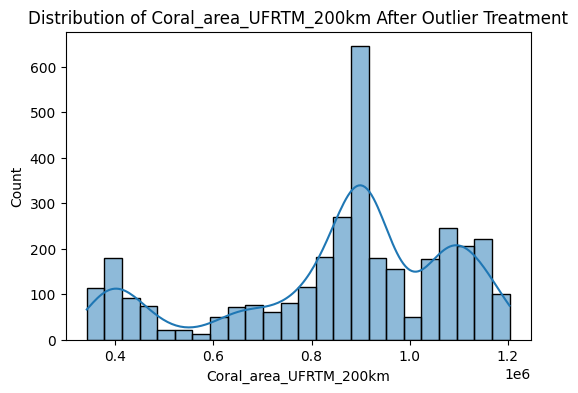

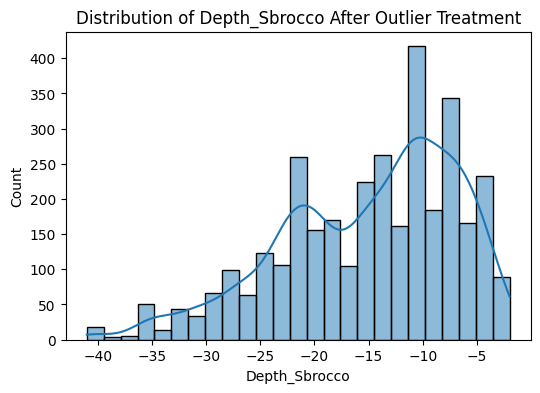

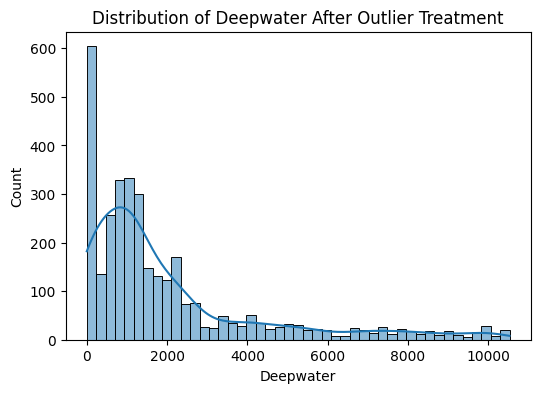

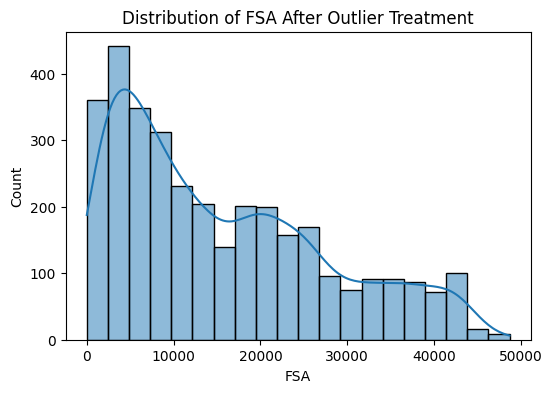

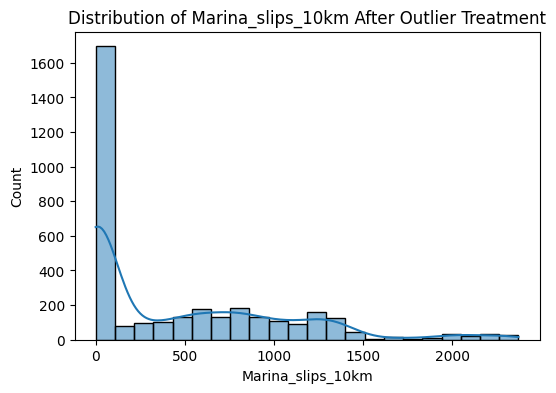

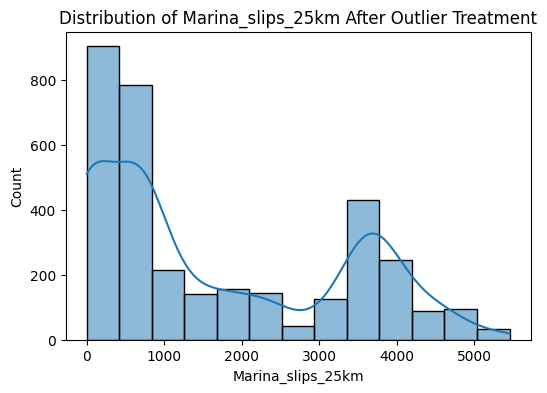

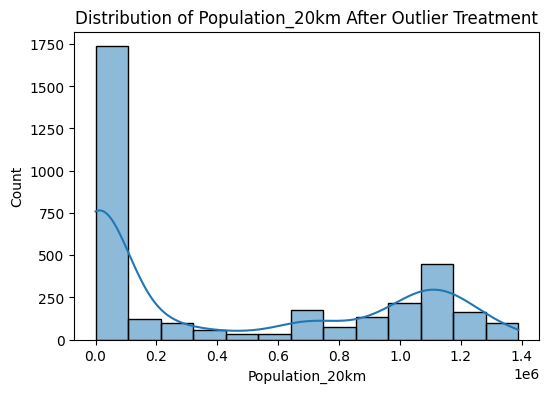

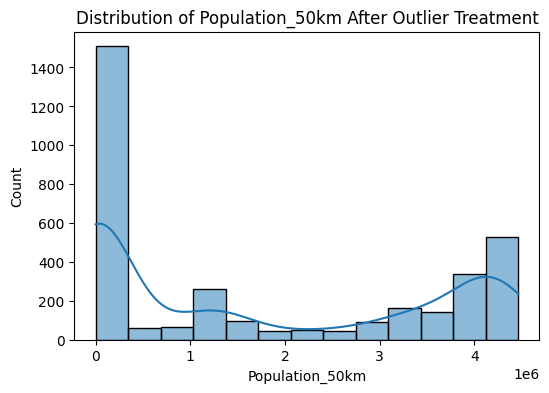

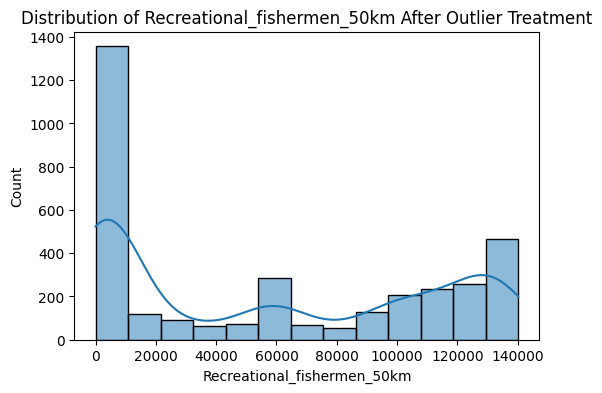

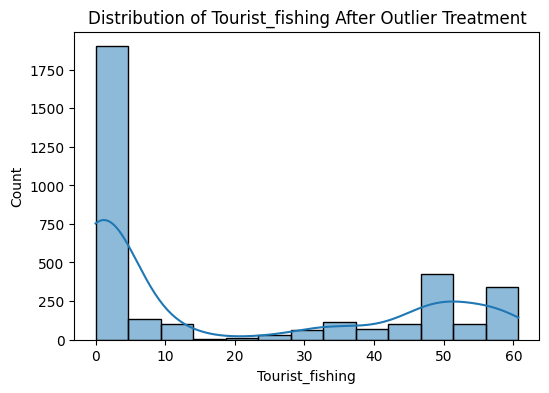

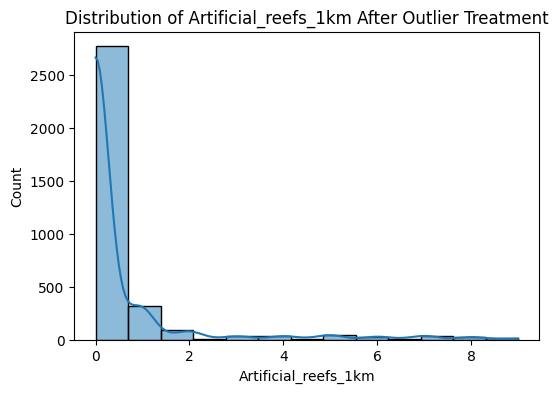

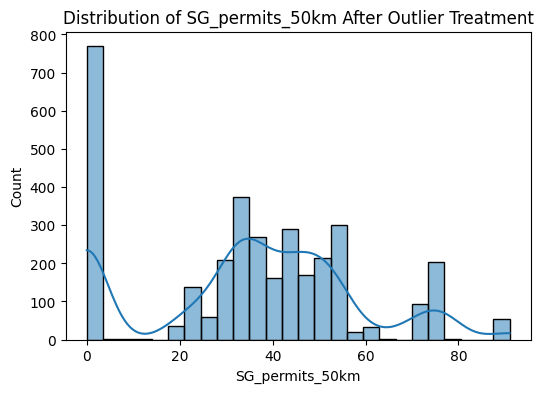

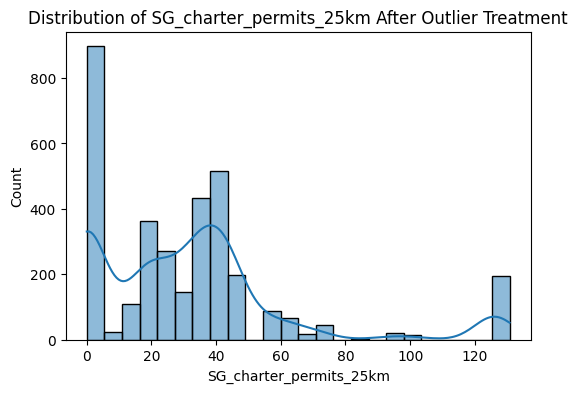

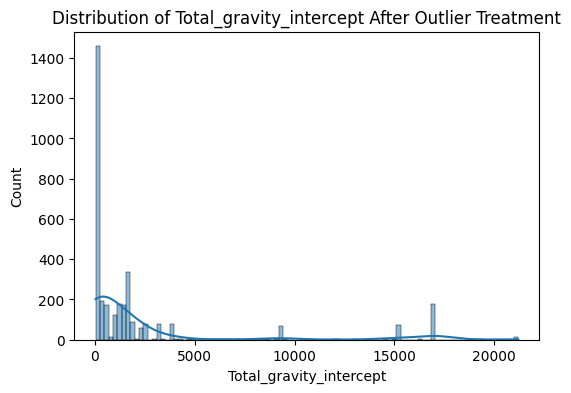

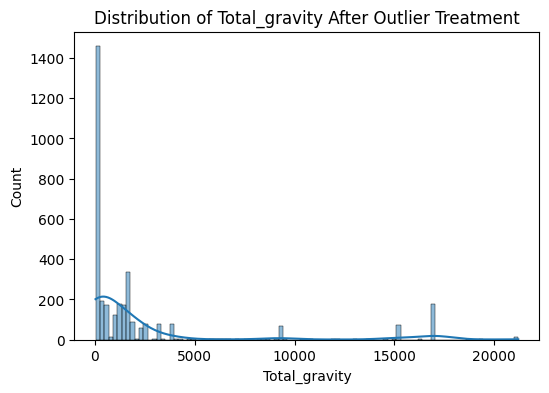

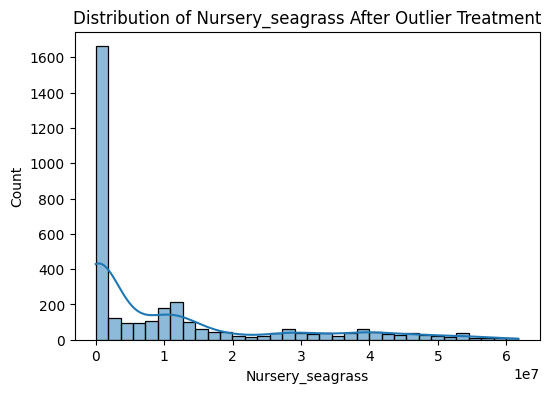

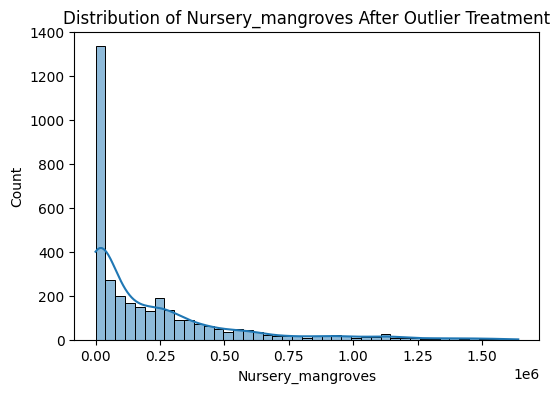

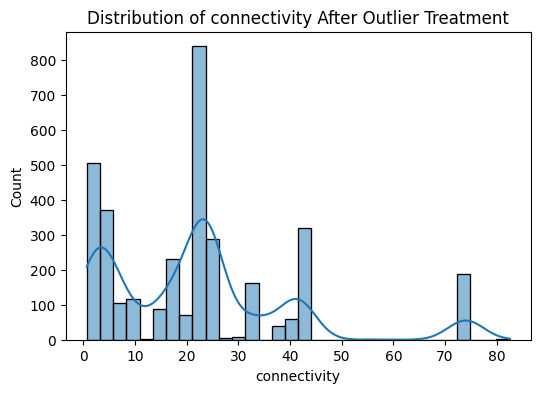

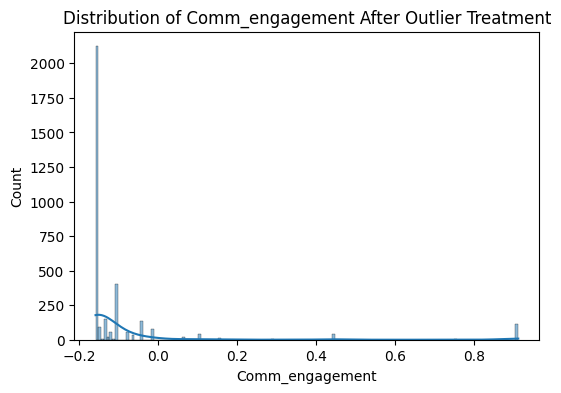

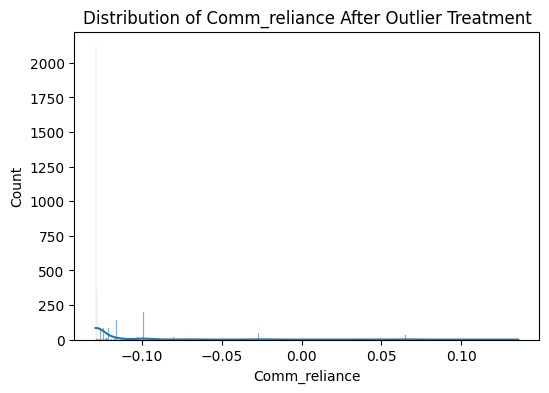

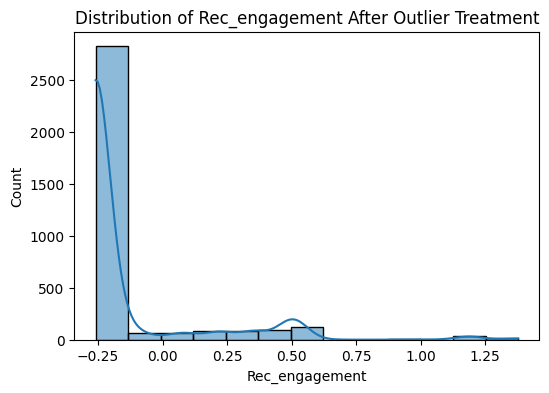

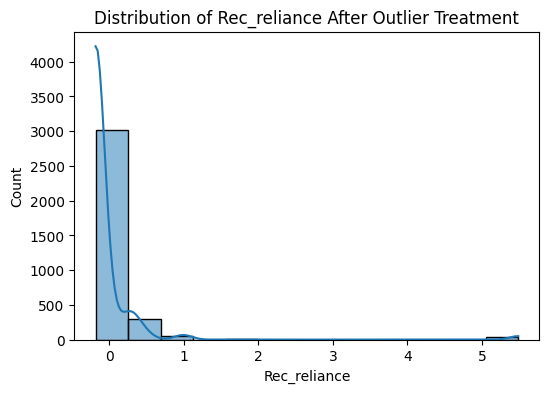

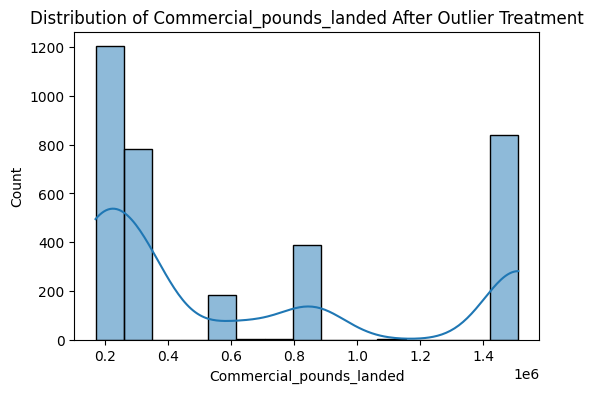

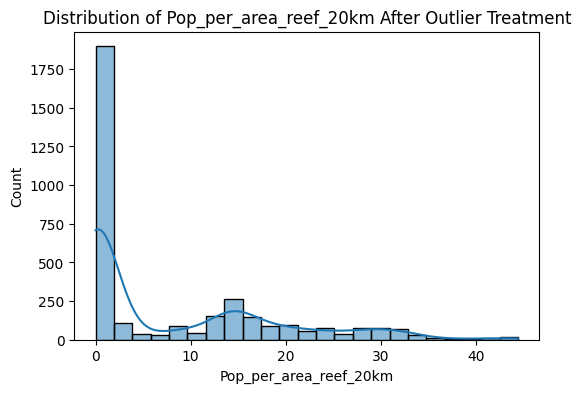

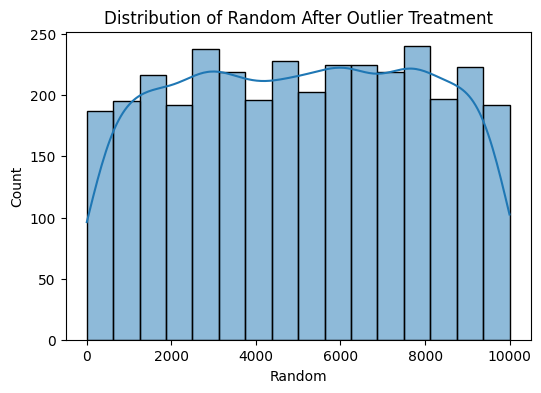

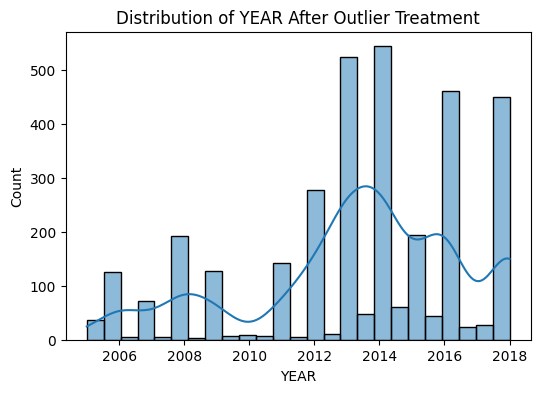

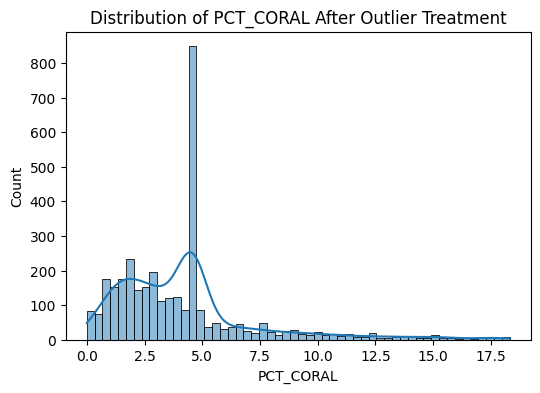

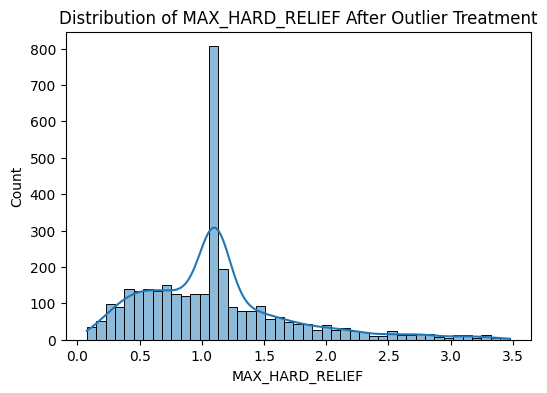

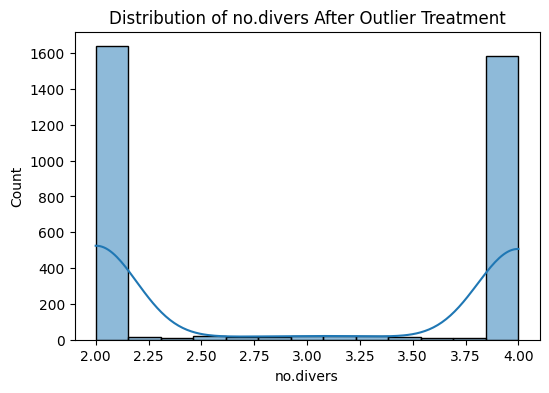

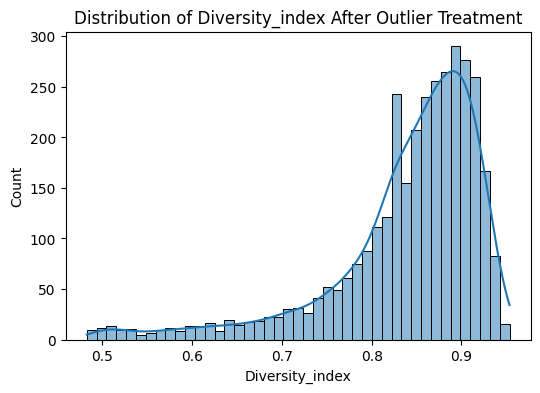

In [29]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Step 5: Detect and treat outliers using the Z-score method:

# Step 5.1: Select only numeric columns from the resampled data:
numeric_cols = X_resampled.select_dtypes(include=['float64', 'int64']).columns

# Step 5.2: Iterate through each numeric column to calculate Z-scores:
for col in numeric_cols:
    # Calculate Z-scores for the current column
    z_scores = np.abs(stats.zscore(X_resampled[col]))
    
    # Step 5.3: Handle outliers by capping them to the mean:
    # Replace outliers (Z-scores > 3) with the mean of the column
    X_resampled[col] = np.where(z_scores > 3, X_resampled[col].mean(), X_resampled[col])

# Step 5.4: Visualize the distribution after treating outliers:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_resampled[col], kde=True)
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.show()

Feature Scaling Using StandardScaler.

In this code, we apply Feature Scaling to ensure that all features are on the same scale, 
which can improve the performance of many machine learning algorithms. 
We use the 'StandardScaler' from 'sklearn', which standardizes the features by removing the mean and scaling to unit variance (Z-score normalization).

In [30]:
from sklearn.preprocessing import StandardScaler

# Step 6: Apply feature scaling using StandardScaler:

scaler = StandardScaler()

# Fit and transform the resampled data:
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame for easier interpretation:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

# Check the first few rows of the scaled data:
print("First few rows of scaled data:")
print(X_scaled_df.head())

First few rows of scaled data:
   Unnamed: 0      Year  Latitude  Longitude     Depth  Coral_cover  \
0   -1.927777 -2.529444 -1.260912  -0.859236 -0.514851    -0.692539   
1   -1.926876 -2.529444 -1.243351  -0.753996 -0.655685     0.643790   
2   -1.923269 -2.529444 -1.237194  -0.708091  1.888739     4.299105   
3   -1.920565 -2.529444 -1.223986  -0.653369  1.019485     1.805683   
4   -1.918761 -2.529444 -1.197344  -0.636761 -1.103208     2.131495   

   Reef_complexity       SST       NPP  Wave_exposure  ...  HABITAT_CD_LIRO  \
0        -0.928785 -0.209204  0.342508      -2.785502  ...        -0.247487   
1         1.314079 -0.236822  0.518907      -3.104731  ...        -0.247487   
2         0.161854 -0.151752  0.325600      -2.604698  ...        -0.247487   
3         1.001223 -0.043002  0.327871      -0.091354  ...        -0.247487   
4        -0.107169 -0.195961  0.863802      -0.091354  ...        -0.247487   

   HABITAT_CD_PTCH  HABITAT_CD_RGDP  HABITAT_CD_RGSH  HABITAT_CD_RU

Checking Categorical Columns and One-Hot Encoding.

This script is used to inspect the categorical columns before applying One-Hot Encoding and to verify the number of columns after encoding.

In [31]:
# Check categorical columns before One-Hot Encoding:
categorical_cols = X_imputed_df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    print(f"{col}: {X_imputed_df[col].nunique()} unique values")
    
# Check the number of columns after One-Hot Encoding:
print("Number of columns after One-Hot Encoding:", X_encoded.shape[1])

site: 3999 unique values
model: 2 unique values
Month: 8 unique values
Region: 3 unique values
Habitat_type_classLV0: 3 unique values
Habitat_type_classLV2: 8 unique values
Marine_reserve: 2 unique values
Keys_Divisions: 5 unique values
FKNMS: 1 unique values
DryTortugas: 1 unique values
BNP: 1 unique values
CoralECA: 1 unique values
HABITAT_CD: 20 unique values
REGION: 3 unique values
Number of columns after One-Hot Encoding: 4084


Feature Scaling with StandardScaler and Displaying All Rows.

This script demonstrates how to apply feature scaling using StandardScaler and how to display all rows of the scaled data in a 'pandas' DataFrame. 
This is particularly useful when you want to inspect the entire dataset after scaling.

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 6: Apply feature scaling using StandardScaler:

scaler = StandardScaler()

# Fit and transform the resampled data:
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame for easier interpretation:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

# Adjust display settings to show all rows of the DataFrame:
pd.set_option('display.max_rows', None)

# Display all rows of the scaled data:
print("Scaled data (all rows):")
print(X_scaled_df)

# Reset the display option to default (optional)
# pd.reset_option('display.max_rows')

Scaled data (all rows):
      Unnamed: 0      Year  Latitude  Longitude     Depth  Coral_cover  \
0      -1.927777 -2.529444 -1.260912  -0.859236 -0.514851    -0.692539   
1      -1.926876 -2.529444 -1.243351  -0.753996 -0.655685     0.643790   
2      -1.923269 -2.529444 -1.237194  -0.708091  1.888739     4.299105   
3      -1.920565 -2.529444 -1.223986  -0.653369  1.019485     1.805683   
4      -1.918761 -2.529444 -1.197344  -0.636761 -1.103208     2.131495   
5      -1.916057 -2.529444 -1.208596  -0.605867 -0.831400    -0.213203   
6      -1.914254 -2.529444 -1.201009  -0.592126 -0.629845    -0.852955   
7      -1.913352 -2.529444 -1.201586  -0.587213 -1.090117    -0.210111   
8      -1.912450 -2.529444 -1.163470  -0.586399 -1.176727     0.152879   
9      -1.911549 -2.529444 -1.150445  -0.570916 -1.113669     3.461701   
10     -1.910647 -2.529444 -1.152656  -0.560661 -1.219893     0.152879   
11     -1.909746 -2.529444 -1.191868  -0.532780  1.802044     2.095160   
12     -1.9088

Feature Selection:

Feature Importance Using Random Forest Classifier.

In this code, we use a Random Forest Classifier to identify and rank the most important features in a dataset after applying feature scaling. 
The goal is to fit a Random Forest model, extract feature importance scores, and select the top N important features.


In [34]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Step 1: Initialize a Random Forest Classifier:
rf = RandomForestClassifier(random_state=42)

# Step 2: Fit the model on the scaled data (assuming classification).
rf.fit(X_scaled_df, y_resampled)

# Step 3: Get feature importance scores:
importances = rf.feature_importances_

# Create a DataFrame for feature importance:
feat_importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': importances
})

# Sort by importance:
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Select the top N important features (e.g., top 20 features).
top_features = feat_importance_df.head(20)

#Subset Data: Use the top 20 features identified by Random Forest.

# Display top 20 important features
print("Top 20 important features based on Random Forest:")
print(top_features)

Top 20 important features based on Random Forest:
                          Feature  Importance
20                Tourist_fishing    0.061925
18                Population_50km    0.047921
17                Population_20km    0.043671
34         Pop_per_area_reef_20km    0.042424
22                SG_permits_50km    0.042246
16              Marina_slips_25km    0.041230
19    Recreational_fishermen_50km    0.038841
11         Coral_area_UFRTM_200km    0.038807
2                        Latitude    0.034358
23        SG_charter_permits_25km    0.033605
3                       Longitude    0.033526
7                             SST    0.033156
24        Total_gravity_intercept    0.032003
25                  Total_gravity    0.031477
8                             NPP    0.031122
28                   connectivity    0.029944
15              Marina_slips_10km    0.028804
14                            FSA    0.023866
10          Coral_area_UFRTM_20km    0.020134
4062    Keys_Divisions_Upper K

Detecting and Removing Outliers Using Z-Scores.

In this code, we detect and remove outliers from the dataset based on Z-scores. 
Outliers are identified in numeric columns using a Z-score threshold, and rows containing any outliers are removed from both the feature matrix ('X_scaled_df') and the target variable ('y_resampled').

In [35]:
import numpy as np
from scipy import stats

# Step 1: Calculate Z-scores for each numeric column:
numeric_cols = X_scaled_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(X_scaled_df[numeric_cols]))

# Step 2: Define a threshold for detecting outliers (e.g., Z-score > 3):
outliers = (z_scores > 3)

# Step 3: Remove rows that contain any outliers:
X_no_outliers = X_scaled_df[(outliers < 3).all(axis=1)]
y_no_outliers = y_resampled[(outliers < 3).all(axis=1)]

# Step 4: Display the number of inliers and outliers:
print(f"Number of inliers: {X_no_outliers.shape[0]}")
print(f"Number of outliers: {X_scaled_df.shape[0] - X_no_outliers.shape[0]}")

Number of inliers: 3396
Number of outliers: 0


Splitting Data into Training and Test Sets Using train_test_split.

This code demonstrates how to split the dataset into training and test sets using 'train_test_split' from 'sklearn'. 
This step is crucial for model evaluation, as it ensures that we have separate data for training and testing our machine learning model.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3097, 4084)
Test set size: (775, 4084)


Model Training.

Training a Random Forest Classifier.

This code demonstrates how to initialize, train, and fit a Random Forest Classifier on a training dataset using 'sklearn'. Random Forest is a powerful ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Model Evaluation.

Model Evaluation: Accuracy, Classification Report, and Confusion Matrix.

This code demonstrates how to evaluate the performance of a trained Random Forest Classifier using common classification metrics such as accuracy, a classification report, and a confusion matrix. These metrics help assess how well the model is performing on the test set.

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.984516129032258
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.98       206
         Low       0.97      0.98      0.97       197
   Very High       0.99      1.00      0.99       188
    Very Low       0.99      0.98      0.99       184

    accuracy                           0.98       775
   macro avg       0.98      0.98      0.98       775
weighted avg       0.98      0.98      0.98       775

Confusion Matrix:
 [[201   3   2   0]
 [  3 193   0   1]
 [  0   0 188   0]
 [  0   3   0 181]]


Perform cross-validation to ensure the model's generalizability on Random Forest, Logistic Regression, and Gradient Boosting.

This script demonstrates how to perform cross-validation on multiple classifiers (Random Forest, Logistic Regression, and Gradient Boosting) using 'cross_val_score' from 'sklearn'. 
Cross-validation is an important technique used to assess model performance by splitting the data into multiple folds and averaging the accuracy across these folds. This helps to reduce the risk of overfitting.

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), 
                               X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print("Random Forest Cross-Validation Scores: ", rf_cv_scores)
print("Random Forest Mean Cross-Validation Accuracy: ", rf_cv_scores.mean())

# Perform cross-validation on Logistic Regression
lr_cv_scores = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), 
                               X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores: ", lr_cv_scores)
print("Logistic Regression Mean Cross-Validation Accuracy: ", lr_cv_scores.mean())

# Perform cross-validation on Gradient Boosting
gb_cv_scores = cross_val_score(GradientBoostingClassifier(random_state=42), 
                               X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Gradient Boosting Cross-Validation Scores: ", gb_cv_scores)
print("Gradient Boosting Mean Cross-Validation Accuracy: ", gb_cv_scores.mean())

Random Forest Cross-Validation Scores:  [0.98451613 0.98322581 0.94702842 0.97286822 0.96899225]
Random Forest Mean Cross-Validation Accuracy:  0.9713261648745519


C:\Users\nihal\anaconda3\envs\boot-3.9\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nihal\anaconda3\envs\boot-3.9\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Logistic Regression Cross-Validation Scores:  [0.79870968 0.74709677 0.76356589 0.74547804 0.78552972]
Logistic Regression Mean Cross-Validation Accuracy:  0.7680760190047512
Gradient Boosting Cross-Validation Scores:  [0.99096774 0.99354839 0.97028424 0.98191214 0.99483204]
Gradient Boosting Mean Cross-Validation Accuracy:  0.9863089105609737


Cross-Validation for Random Forest Classifier.

This script demonstrates how to perform 5-fold cross-validation using the 'cross_val_score' function from 'sklearn'. 
Cross-validation is used to evaluate the model's performance by dividing the data into 5 folds, training on 4 of them, and testing on the remaining fold. This process is repeated for each fold, and the accuracy scores are averaged to get a better understanding of how well the model generalizes to unseen data.

In [37]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.98451613 0.98322581 0.94702842 0.97286822 0.96899225]
Mean cross-validation accuracy: 0.9713261648745519


In [ ]:
Hyperparameter Tuning Using GridSearchCV.

This code demonstrates how to use GridSearchCV to perform hyperparameter tuning for a Random Forest Classifier. 
Grid search allows us to search for the best combination of hyperparameters by evaluating model performance across different combinations of parameters. The best hyperparameters are selected based on cross-validation accuracy.

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.980629527333368


Visualizing Feature Importance from Random Forest Classifier.

This code demonstrates how to extract and visualize the Feature Importance from a trained Random Forest Classifier. 
Feature importance gives insight into which features contribute the most to the model's predictions, helping to understand the model's behavior.

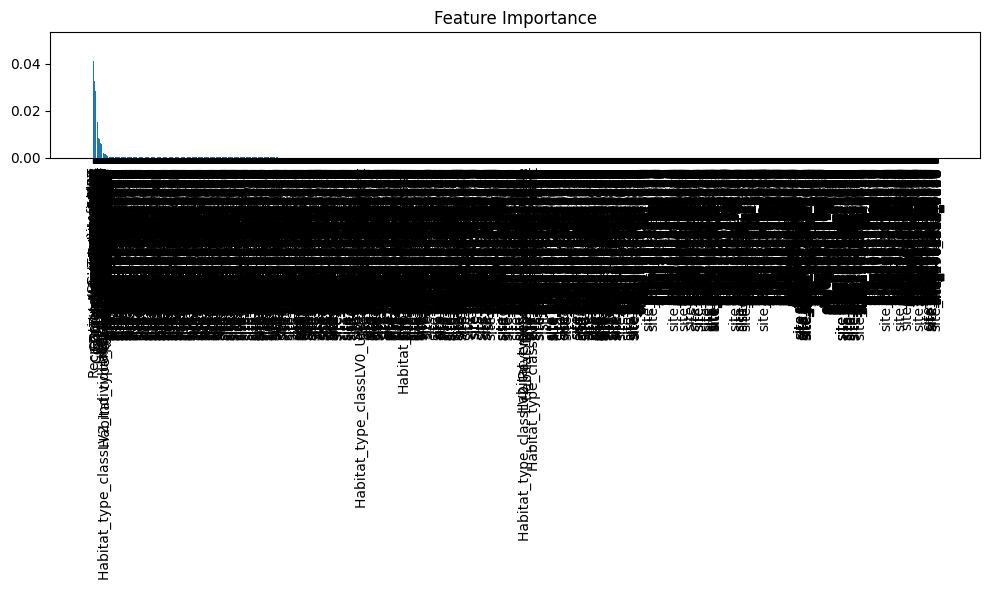

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Create a plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

Training, Predicting, and Evaluating Multiple Models.

This code demonstrates how to train, predict, and evaluate multiple machine learning models using Random Forest, Logistic Regression, and Gradient Boosting. After training the models, predictions are made on the test set, and the models are evaluated using accuracy and classification reports.

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n {classification_report(y_test, y_pred)}")
    print("-" * 60)

Random Forest Accuracy: 0.984516129032258
Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.98       206
         Low       0.97      0.98      0.97       197
   Very High       0.99      1.00      0.99       188
    Very Low       0.99      0.98      0.99       184

    accuracy                           0.98       775
   macro avg       0.98      0.98      0.98       775
weighted avg       0.98      0.98      0.98       775

------------------------------------------------------------


C:\Users\nihal\anaconda3\envs\boot-3.9\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7548387096774194
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.56      0.65       206
         Low       0.67      0.78      0.72       197
   Very High       0.70      0.88      0.78       188
    Very Low       0.94      0.82      0.87       184

    accuracy                           0.75       775
   macro avg       0.77      0.76      0.76       775
weighted avg       0.77      0.75      0.75       775

------------------------------------------------------------
Gradient Boosting Accuracy: 0.9896774193548387
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.99      0.98       206
         Low       1.00      0.97      0.99       197
   Very High       0.98      1.00      0.99       188
    Very Low       0.99      1.00      1.00       184

    accuracy                           0.99       

Random Forest Classifier: Training, Evaluation, Cross-Validation, and Hyperparameter Tuning.

This code provides a comprehensive workflow for training and evaluating a Random Forest Classifier. It includes steps for splitting the data, training the model, evaluating it with accuracy, classification report, and confusion matrix, and performing cross-validation to ensure generalization. It also includes hyperparameter tuning using GridSearchCV.

In [54]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Initialize and Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 3: Evaluate the Model on Test Set
y_pred = rf_classifier.predict(X_test)

# Step 4: Print Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 5: Perform Cross-Validation to Ensure Generalization
cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean()}")

# Optional Step: Hyperparameter Tuning (Grid Search)
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score from GridSearch
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_}")

# Step 6: Use the Best Model from GridSearch (if needed)
# If you want to use the best-tuned model from GridSearch for final evaluation:
best_rf_classifier = grid_search_rf.best_estimator_

# Evaluate the tuned model on the test set
y_pred_best = best_rf_classifier.predict(X_test)

# Final performance of the best-tuned model
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Tuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Random Forest Accuracy: 0.984516129032258
Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.98      0.98       206
         Low       0.97      0.98      0.97       197
   Very High       0.99      1.00      0.99       188
    Very Low       0.99      0.98      0.99       184

    accuracy                           0.98       775
   macro avg       0.98      0.98      0.98       775
weighted avg       0.98      0.98      0.98       775

Confusion Matrix:
[[201   3   2   0]
 [  3 193   0   1]
 [  0   0 188   0]
 [  0   3   0 181]]
Cross-validation scores: [0.98451613 0.98322581 0.94702842 0.97286822 0.96899225]
Mean Cross-validation Accuracy: 0.9713261648745519
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.980629527333368
Tuned Random Forest Accuracy: 0.984516129032258
Tuned Random Forest Classification Report:
              precision 

Data Preprocessing: Loading, Cleaning, and Handling Missing Values.

This code demonstrates how to load a dataset, drop irrelevant columns, and handle missing values using SimpleImputer from 'sklearn'. 
Numeric columns are imputed with the mean, while categorical columns are imputed with the most frequent value.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
species_df = pd.read_csv(r"C:\Users\nihal\OneDrive\Desktop\ML Project 2\Project 2\Data\species.csv")

# Drop irrelevant columns
species_df = species_df.drop(columns=['Unnamed: 0', 'site', 'Year', 'Month'])

# Handle missing values
numeric_cols = species_df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
species_df[numeric_cols] = imputer.fit_transform(species_df[numeric_cols])

# For categorical columns, impute with the most frequent value
categorical_cols = species_df.select_dtypes(include=['object', 'category']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
species_df[categorical_cols] = imputer_cat.fit_transform(species_df[categorical_cols])

# Ensure no missing values remain
print(species_df.isnull().sum())

model                          0
Latitude                       0
Longitude                      0
Depth                          0
Region                         0
Coral_cover                    0
Reef_complexity                0
SST                            0
NPP                            0
Wave_exposure                  0
Habitat_type_classLV0          0
Habitat_type_classLV2          0
Coral_area_UFRTM_20km          0
Coral_area_UFRTM_200km         0
Depth_Sbrocco                  0
Deepwater                      0
FSA                            0
Marina_slips_10km              0
Marina_slips_25km              0
Marine_reserve                 0
Population_20km                0
Population_50km                0
Recreational_fishermen_50km    0
Tourist_fishing                0
Artificial_reefs_1km           0
SG_permits_50km                0
SG_charter_permits_25km        0
Total_gravity_intercept        0
Total_gravity                  0
Keys_Divisions                 0
FKNMS     

Separating Features and Target Variable, and Splitting the Data into Training and Testing Sets.

This script separates the dataset into Features ('X') and Target Variable ('y'), and then splits the data into training and testing sets using an 80/20 split. This is a common step in machine learning to ensure the model is trained on one part of the data and tested on a separate part for evaluation.

In [3]:
# Separate features (X) and target variable (y)
X = species_df.drop(columns=['Diversity_index'])  # Features
y = species_df['Diversity_index']  # Target (Diversity Index)

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (3199, 51)
Test data shape: (800, 51)


Building a Machine Learning Pipeline with Preprocessing and Random Forest Regressor.

This code demonstrates how to build a machine learning pipeline using 'sklearn' to preprocess both categorical and numerical data and train a Random Forest Regressor. The pipeline is designed to handle missing values, scale numerical features, one-hot encode categorical features, and train the model. We also use cross-validation to evaluate model performance using mean squared error.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define a preprocessing pipeline for categorical and numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a pipeline with preprocessing and the RandomForestRegressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler(with_mean=False)),  # Normalize features
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model with the pipeline
rf_pipeline.fit(X_train, y_train)

# Perform cross-validation to check model stability
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean()}")

Cross-validation MSE: 0.011019506225101136


Model Evaluation and Performance: Calculating RMSE and R-squared on Test Set

After training the model and making predictions on the test set, this script calculates the performance metrics Root Mean Squared Error (RMSE) and R-squared (R²) to evaluate how well the model generalizes to unseen data.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# Calculate RMSE and R-squared
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Test RMSE: 0.10668200139975231
Test R-squared: 0.14169088226709958


Extracting and Visualizing Feature Importances from a Random Forest Regressor.

This script demonstrates how to extract the feature importances from a trained Random Forest Regressor within a pipeline that includes preprocessing steps (such as one-hot encoding for categorical features) and how to visualize the feature importances using a bar plot.

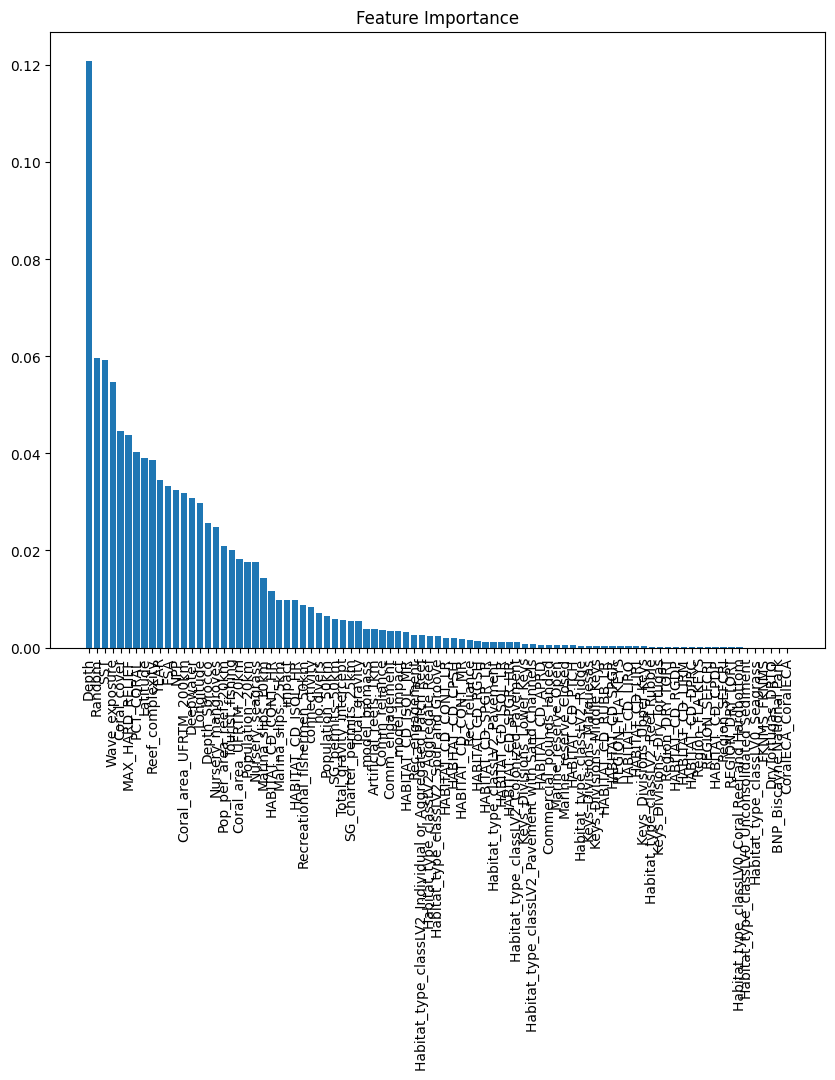

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the trained Random Forest model from the pipeline
rf_model = rf_pipeline.named_steps['regressor']

# Get the one-hot encoded feature names from the pipeline's preprocessor
# This will include the transformed categorical feature names
encoded_cols = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine original numeric column names with one-hot encoded categorical column names
all_feature_names = np.concatenate([X.select_dtypes(include=['float64', 'int64']).columns, encoded_cols])

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get the order of importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), all_feature_names[indices], rotation=90)
plt.show()

Visualizing the Top N Feature Importances from a Random Forest Regressor.

This script demonstrates how to extract the top 20 most important features from a trained Random Forest Regressor and visualize them in a bar plot. 
This is useful when focusing on the most influential features in the model.

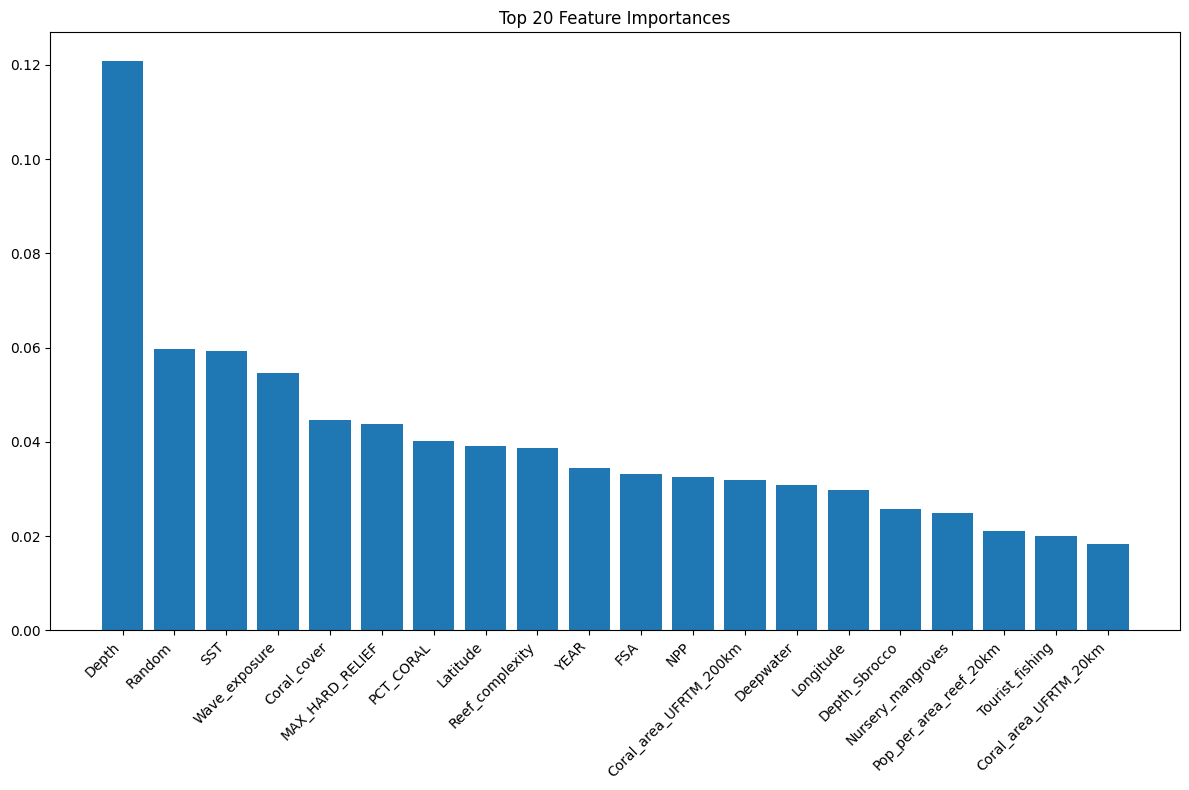

In [10]:
# Number of top features to display
top_n = 20

# Extract the trained Random Forest model from the pipeline
rf_model = rf_pipeline.named_steps['regressor']

# Get the one-hot encoded feature names from the pipeline's preprocessor
encoded_cols = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine original numeric column names with one-hot encoded categorical column names
all_feature_names = np.concatenate([X.select_dtypes(include=['float64', 'int64']).columns, encoded_cols])

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get the order of importance
indices = np.argsort(importances)[::-1]

# Limit to top N features
top_indices = indices[:top_n]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), all_feature_names[top_indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()

Depth being the top feature aligns with ecological knowledge, as deeper or shallower waters can affect fish species diversity.

Environmental and coral-related features are also playing a significant role, which makes sense given the dataset and problem at hand.